#### 실습 과제
mtcars.csv 데이터 셋에서 mpg 예측모델을 생성하기 위해 필요한 전처리 및 탐색적 분석을 수행한 결과로 데이터셋을 도출한 후 주어진 모델링 및 평가코드를 적용하여 결과를 출력하세요.

[데이터 셋 변수 설명]

- mpg: 연비(miles per gallon)
- cyl: 실린더 개수(number of cylinders)
- disp: 배기량(displacement)
- hp: 마력(horsepower)
- drat: 후륜비(rear axle ratio)
- wt: 차량 무게(weight)
- qsec: 1/4 마일 달성 시간(1/4 mile time)
- vs: 엔진 형태(V/S)
- am: 변속기 종류(automatic or manual)
- gear: 기어 수(number of gears)
- carb: 기화기 개수(number of carburetors)

mpg랑 다른 column이랑 어떤 상관관계가 있는지 구하기

In [ ]:
# car version data 간단 복잡 간단한거 하나 복잡한거(과제)
# mpg를 나머지 독립,설명변수로부터 예측 전처리할건 별로 없음 - 나머지 어떻게 영향 끼치는거 확인
# 쓰레시홀드 임계치 코딩으로 가능
# 색으로 상관관계 볼 수 있어서 히트맵이라 함 빨강일수록 양 파랑일수록 음 흐리면 0
# 독립변수 종면변수
# 전처리
# 데이터 불러오기 > info로 살펴보기(결측치, 문자, 컬럼d-type/데이터 형식적 부분) describe(통계적 체크) value_counts, unique > 변수 선택[중요 변수 탐색(변수 간 상관관계, 높을수록 좋음(종속/독립), 변수 자체 분포) > 파생 변수 > 탐색적 분석 시도
# 파생 VS 종변 상관관계] > 표준화/정규화 > 적용한 분석용 DARASET 준비/corelation 스케일링 차 반영은 됨 차이 축소(차이 극단이면 안 보임)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# import pandas as pd
file_path = 'drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/mtcars.csv'
# file_path = 'mtcars.csv'
df = pd.read_csv(file_path,index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# mpg: 연비(miles per gallon)
# cyl: 실린더 개수(number of cylinders)
# disp: 배기량(displacement)
# hp: 마력(horsepower)
# drat: 후륜비(rear axle ratio)
# wt: 차량 무게(weight)
# qsec: 1/4 마일 달성 시간(1/4 mile time) quater 쿼터
# vs: 엔진 형태(V/S)
# am: 변속기 종류(automatic or manual)
# gear: 기어 수(number of gears)
# carb: 기화기 개수(number of carburetors)

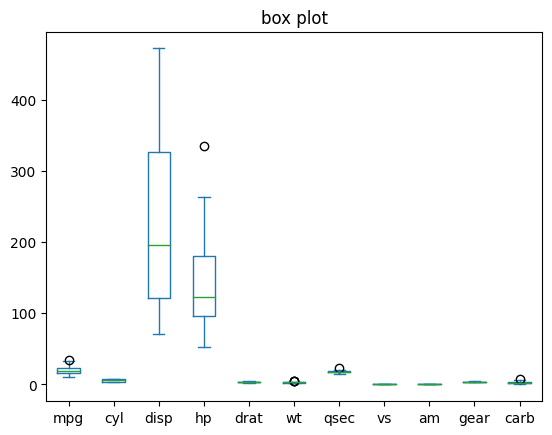

In [ ]:
df.plot.box()
# df.boxplot(column='mpg') 1개만 볼때 사용
plt.title('box plot')
plt.show()

In [ ]:
num_columns = len(df.columns)

plt.figure(figsize=(12,12))
for i, column in enumerate(df.columns): # enumerate index와 같이 나옴
  plt.subplot(4, 3, i + 1)
  df.boxplot(column=column)
  plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
# 파생변수 만들때 사용
piv_t = df.pivot_table(values='hp', index='cyl', columns='gear', aggfunc='mean', fill_value=0)
piv_t

In [ ]:
# 더 디테일하게 살펴야 함
correlation_matrix = df.corr()
target_variable = 'mpg'
correlation_threshold = 0.5
correlated_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > correlation_threshold].index.tolist()
correlated_features

['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']

In [ ]:
print(correlation_matrix)
correlation_matrix[[target_variable]] # [[]] : dataframe [] : series

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

,mpg
mpg,1.000000
cyl,-0.852162
disp,-0.847551
hp,-0.776168
drat,0.681172
wt,-0.867659
qsec,0.418684
vs,0.664039
am,0.599832
gear,0.480285


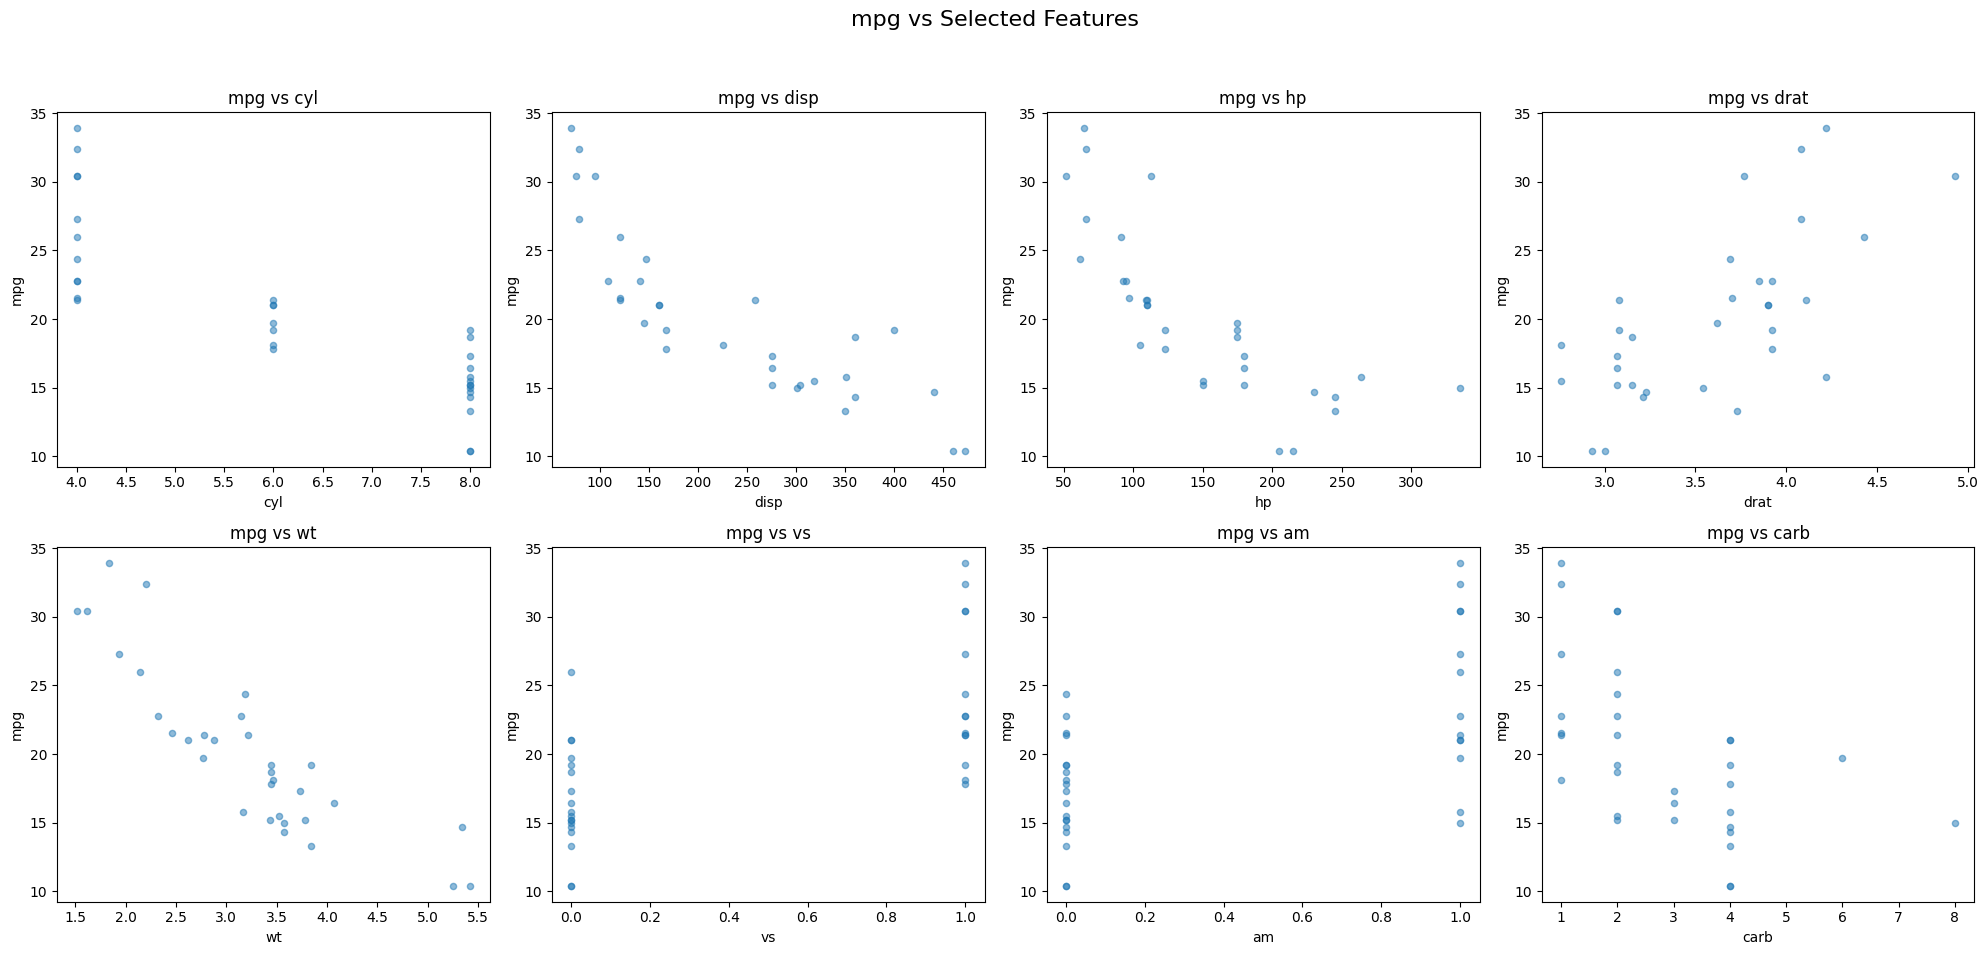

In [ ]:
# 분석할 컬럼들
columns = ['cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']
target = 'mpg'

# 2행 4열의 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# 각 subplot에 산점도 그리기
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 4)
    df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')

# 전체 제목 설정
fig.suptitle(f'{target} vs Selected Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

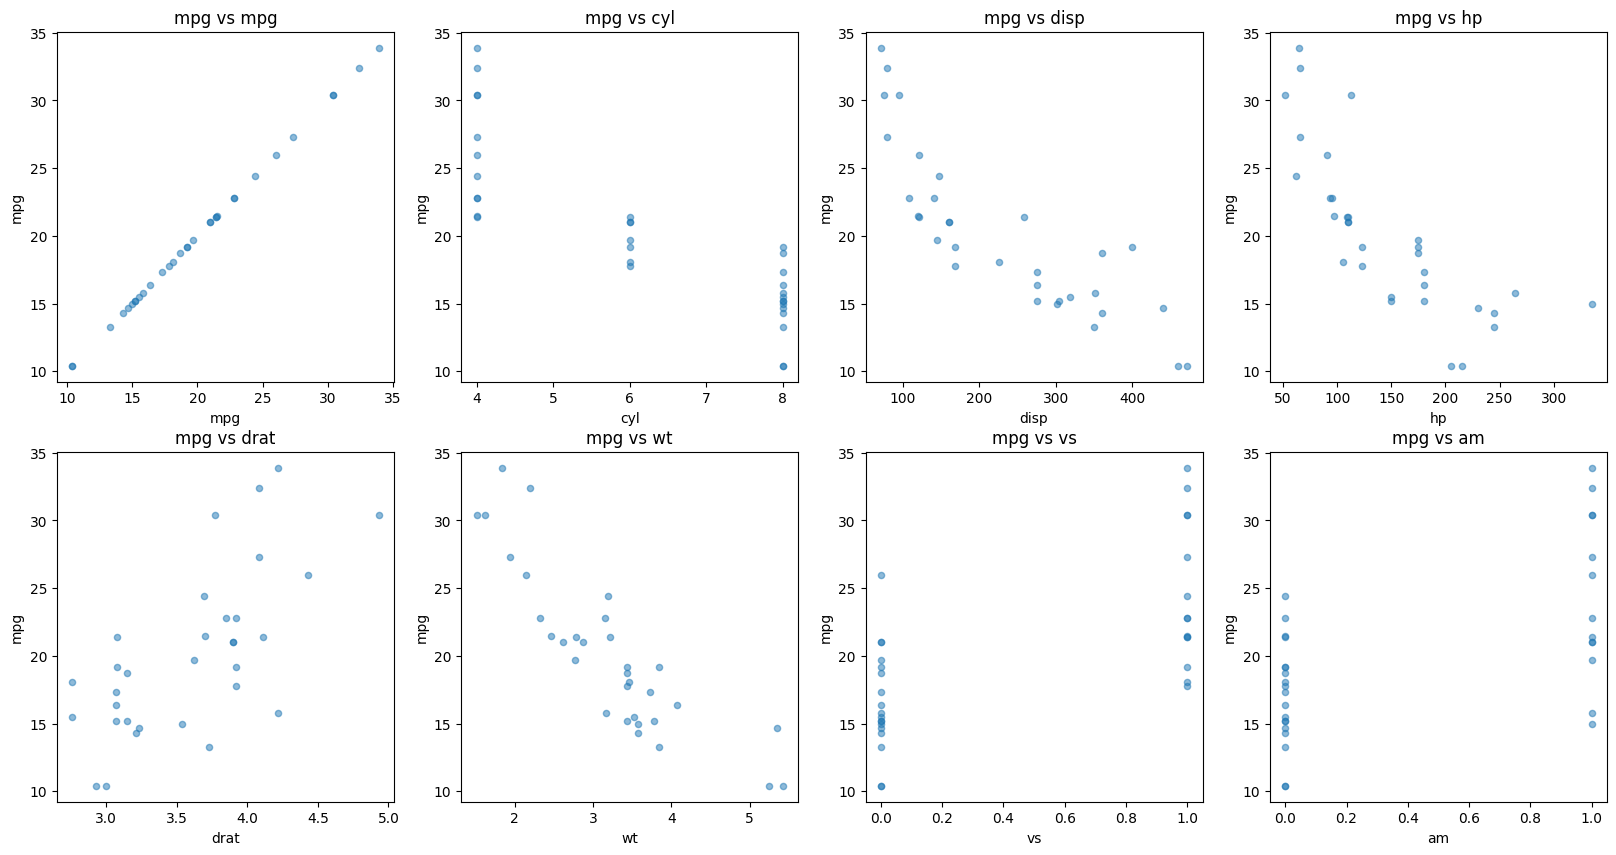

In [ ]:
columns = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']
target = 'mpg'

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for i, col in enumerate(columns):
  row, col_idx = divmod(i, 4) # divmod : 몫과 나머지 알려주는 나누기
  df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row, col_idx].set_title(f'{target} vs {col}')

fig.suptitle(f'{target} vs Selected Features', fontsize =16) # b 아님 p
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
corre_m =df[['cyl', 'disp', 'wt', 'hp', 'vs']]
corre_m.tail()

,cyl,disp,wt,hp,vs
Lotus Europa,4,95.1,1.513,113,1
Ford Pantera L,8,351.0,3.170,264,0
Ferrari Dino,6,145.0,2.770,175,0
Maserati Bora,8,301.0,3.570,335,0
Volvo 142E,4,121.0,2.780,109,1


In [ ]:
correlated_features = ['mpg', 'disp', 'hp', 'drat', 'wt']
analysis_df = df[correlated_features]
target_variable = 'mpg'
print(analysis_df)
# sca = StandardScaler()
# sca_f = sca.fit_transform(analysis_df.drop(columns=[target_variable]))

# scaled_df = pd.DataFrame(sca_f, columns = analysis_df)

                      mpg   disp   hp  drat     wt
Mazda RX4            21.0  160.0  110  3.90  2.620
Mazda RX4 Wag        21.0  160.0  110  3.90  2.875
Datsun 710           22.8  108.0   93  3.85  2.320
Hornet 4 Drive       21.4  258.0  110  3.08  3.215
Hornet Sportabout    18.7  360.0  175  3.15  3.440
Valiant              18.1  225.0  105  2.76  3.460
Duster 360           14.3  360.0  245  3.21  3.570
Merc 240D            24.4  146.7   62  3.69  3.190
Merc 230             22.8  140.8   95  3.92  3.150
Merc 280             19.2  167.6  123  3.92  3.440
Merc 280C            17.8  167.6  123  3.92  3.440
Merc 450SE           16.4  275.8  180  3.07  4.070
Merc 450SL           17.3  275.8  180  3.07  3.730
Merc 450SLC          15.2  275.8  180  3.07  3.780
Cadillac Fleetwood   10.4  472.0  205  2.93  5.250
Lincoln Continental  10.4  460.0  215  3.00  5.424
Chrysler Imperial    14.7  440.0  230  3.23  5.345
Fiat 128             32.4   78.7   66  4.08  2.200
Honda Civic          30.4   75.

In [ ]:
from sklearn.preprocessing import StandardScaler

correlated_features = [ 'mpg','disp', 'hp', 'drat', 'wt']
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]

target_variable = 'mpg'
# 데이터셋 확인
#print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

       disp        hp      drat        wt   mpg
0 -0.579750 -0.543655  0.576594 -0.620167  21.0
1 -0.579750 -0.543655  0.576594 -0.355382  21.0
2 -1.006026 -0.795570  0.481584 -0.931678  22.8
3  0.223615 -0.543655 -0.981576 -0.002336  21.4
4  1.059772  0.419550 -0.848562  0.231297  18.7


In [ ]:
# from sklearn.model_selection import train_test_split 일반화된 모델 테스트 80 학습 20 테스트,
# 분리용(학습/테스트)
# from sklearn.linear_model import LinearRegression 선행회귀 모델 방정식
# from sklearn.metrics import mean_squared_error
# 모델 평가(오차 사용 - 절대값(MAE), 음수) mse(자승, 마이너스를 플러스로, 그래서 루트 씀)
# import numpy as np
# from sklearn.metrics import r2_score 100이 만점 설명력 평가용

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 8.99
Root Mean Squared Error: 3.0
R-squared: 0.78


Task1_0531. titanic3 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
file_path = 'drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/titanic3.csv'
df = pd.read_csv(file_path)
#print(df.head())

#df[['fare']]
# pclass, survived, age sex, sibsp, parch
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df['sex'] = df['sex'].replace({'male':1, 'female':0})
df['age'] = df['age'].astype(int)

df1 = df[['pclass', 'survived', 'age', 'sex', 'sibsp', 'parch']]
#df1.isnull().sum()

df1['family_size'] = df1['sibsp'] + df1['parch']

#df1.info()
#df1.describe()


In [ ]:
import seaborn as sns

# 나이 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 생존 여부에 따른 나이 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age and Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# 클래스별 생존율
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler

correlated_features = [ 'pclass', 'survived', 'age', 'sex', 'sibsp', 'parch' ]
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]

target_variable = 'survived'
# 데이터셋 확인
#print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

     pclass       age       sex     sibsp     parch  survived
0 -1.546098 -0.053142 -1.344995 -0.479087 -0.445000         1
1 -1.546098 -2.302094  0.743497  0.481288  1.866526         1
2 -1.546098 -2.146993 -1.344995  0.481288  1.866526         0
3 -1.546098  0.024408  0.743497  0.481288  1.866526         0
4 -1.546098 -0.363342 -1.344995  0.481288  1.866526         0


In [31]:

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 0.16
Root Mean Squared Error: 0.4
R-squared: 0.35


Task2_0531. auto-mpg.csv 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

- 전처리랑 평가도 하면 됨. 같은 코드 사용 가능 마력이 숫자인데 옵젝되어있음(? 때문이라 제거하고 처리해야함)
- type도 잘 확인하기(astype 사용)

In [ ]:
# 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()